I wrote GD in the form of a module, just to be able to add more algorithms and test it easiy.

It includes more algorithm. You can find them in [1609.04747](https://arxiv.org/abs/1609.04747).

This is how it works

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
import GD

In [3]:
#the squared error and its derivative
def Q_i(model, i, target):
    return (model.signal[i]-target)**2


def dQds_i(model, i, target):
    return 2*(model.signal[i]-target)


#the model and its derivative wrt w
def f(self):
    self.signal[0]=self.input[0]*self.w[0]+ self.w[1]



def dfdw_i(self, i):
    if i==0:
        self.dsdw[0]=self.input[0]
    if i==1:
        self.dsdw[0]=1
        
        
#declare the instances
model=GD.modelFunc(f,dfdw_i,[1,1],[0,0.2])
Q=GD.lossFunc(Q_i,dQds_i,model)

# Example

Lets find $w_1$ and $w_2$ for $f(x) = x w_1+ w_2$ that fit with data taken from $t=2*x+3$.

Obviously the answer is $w_1 = 2$ and $w_2 = 3$.

In [4]:
data_in=[]
data_out=[]
xmin=-5
xmax=3
for i in range(100):
    x=np.random.rand()*(xmax-xmin)+xmin
    
    data_in.append( [x])
    data_out.append( [2*x+3])

# strategy=GD.VanillaGD(Q ,data_in,data_out,alpha=1e-2)
# strategy=GD.RMSpropGD(Q ,data_in,data_out,gamma=0.995,epsilon=1e-6,alpha=1e-2)
# strategy=GD.AdaDeltaGD(Q ,data_in,data_out,gamma=0.99,epsilon=1e-5,alpha=1)
# strategy=GD.AdamGD(Q ,data_in,data_out,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
# strategy=GD.AdaMaxGD(Q ,data_in,data_out,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
strategy=GD.NAdamGD(Q ,data_in,data_out,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)


In [5]:
gd=GD.GradientDescent(strategy)

In [6]:
w=gd.run(abs_tol=1e-4, rel_tol=1e-4, step_break=250,max_step=15000)

w,len(strategy.steps)

([2.0000000032491747, 3.0000000046110977], 368)

<IPython.core.display.Javascript object>


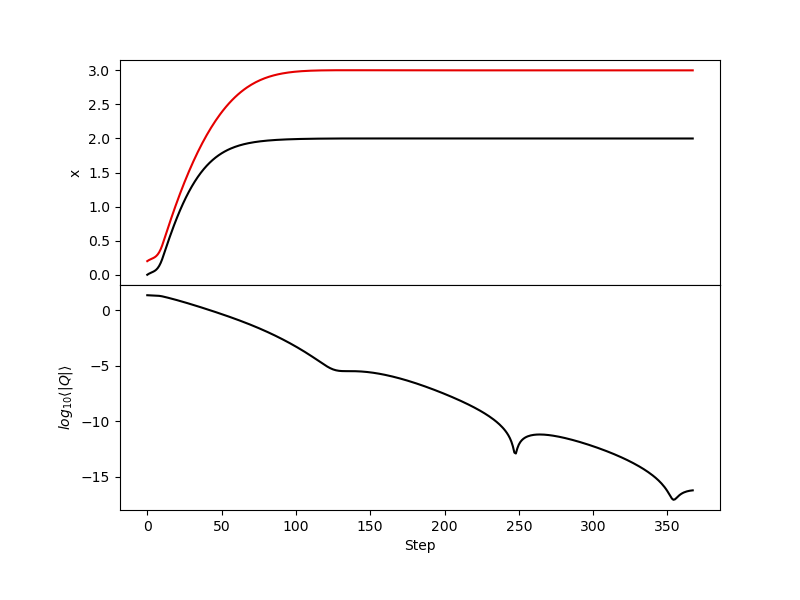

In [7]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)
sub.plot(np.array(gd.strategy.steps)[:,0],c='xkcd:black')
sub.plot(np.array(gd.strategy.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
meanQ=[]
steps=[]
_s=0
_r=len(data_in)
for w in strategy.steps:
    model.w=w
    mQ=0
    for i in range(_r): 
        model.setInput(data_in[i])
        model()
        mQ+= Q(data_out[i]) 
    if mQ==0:
        mQ=1e-50
    meanQ.append(np.log10(mQ/_r))
    steps.append(_s)
    _s+=1
    
sub.plot(steps,meanQ,c='xkcd:black')

sub.set_ylabel(r'$log_{10} \langle |Q| \rangle $')

# sub.set_xscale('log')
sub.set_yscale('linear')

sub.set_xlabel('Step')

plt.show()